<a href="https://colab.research.google.com/github/EnzoItaliano/calculoNumericoEmPython/blob/master/Lista_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Tecnológica Federal do Paraná  
Professor: Wellington José Corrêa  
Orientando: Enzo Dornelles Italiano  
Cálculo Numérico

#Raízes de Equações

Nesta lista vamos determinar numéricamente as raízes da equação $f(x) = 0$ pelos métodos da bissecção, do ponto fixo, Newton-Raphson, secante e regula falsi. Para facilitar o uso ao aluno, usaremos alguns exemplos apresentados em sala.

## 1. Método da Bissecção

De modo a empregar o método da bissecção, basta usar o procedimento bisseccao(f,epsilon,a,b).

Exemplo: Calcule a raiz positiva da equação $f(x)=x^2-3$ com tolerância $\epsilon \leq 0.01$.

Solução: Primeiramente, assim como neste método e nos outros a serem apresentados, é preciso definir a função f(x) pelo comando:
```
def f(x): return x**2-3
```

Para a escolha adequada do intervalo [a,b], é conveniente plotar o gráfico de f recorrendo ao comando:
```
plot2d(f(x), 0, 2)
```

In [0]:
import math
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
def plot2d(f, inicio, fim):
    z = np.arange(inicio,fim,0.1)
    
    y = []
    for i in range(len(z)):
        y.append(f.subs(x,z[i]))
    
    fig, ax = plt.subplots()
    ax.set(title='Gráfico função f(x)='+str(f))
    ax.plot(z,y)
    ax.grid()
    plt.show()

x = symbols('x')
def f(x): return pow(x,2)-3
plot2d(f(x), 0, 2)

Observando o gráfico acima, escolhamos os pontos $a=1$ e $b=2$, por exemplo. Logo,

In [6]:
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sympy import *
import numpy as np

def bisseccao(f, e, a, b):
    fa = f.subs(x,a)
    fb = f.subs(x,b)
    if fa * fb >= 0:
        print("Não atende ao critério f(a) * f(b) < 0")
        return
    
    k = 0
    ak = []
    bk = []
    xk = []
    fak = []
    fbk = []
    xk = []
    fxk = []
    xk_x = []
    ak.append(a)
    bk.append(b)

    kf = math.log((b-a)/e,2)-1
    times = math.ceil(kf) + 1

    for k in range(times):
        if k == 0:
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            xk_x.append('-')
        else:
            if (fak[len(fak)-1] < 0 and fxk[len(fxk)-1] < 0) or (fak[len(fak)-1] > 0 and fxk[len(fxk)-1] > 0):
                ak.append(xk[len(xk)-1])
                bk.append(bk[len(bk)-1])
            else:
                ak.append(ak[len(ak)-1])
                bk.append(xk[len(xk)-1])

            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            temp = xk[len(xk)-1] - xk[len(xk)-2]
            if temp < 0:
                temp = temp * -1
            xk_x.append(temp)

    Table = PrettyTable(["k", "a", "b", "f(a)", "f(b)", "x", "f(x)", "|x(k) - x(k-1)|"])
    for k in range(times):
        Table.add_row([k, ak[k], bk[k], fak[k], fbk[k], xk[k], fxk[k], xk_x[k]])


    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

x = symbols('x')
def f(x): return pow(x,2)-3
bisseccao(f(x), 0.01, 1, 2)

+---+---------+----------+--------------+-------------+-----------+--------------+-----------------+
| k |    a    |    b     |     f(a)     |     f(b)    |     x     |     f(x)     | |x(k) - x(k-1)| |
+---+---------+----------+--------------+-------------+-----------+--------------+-----------------+
| 0 |    1    |    2     |     -2.0     |     1.0     |    1.5    |    -0.75     |        -        |
| 1 |   1.5   |    2     |    -0.75     |     1.0     |    1.75   |    0.0625    |       0.25      |
| 2 |   1.5   |   1.75   |    -0.75     |    0.0625   |   1.625   |  -0.359375   |      0.125      |
| 3 |  1.625  |   1.75   |  -0.359375   |    0.0625   |   1.6875  | -0.15234375  |      0.0625     |
| 4 |  1.6875 |   1.75   | -0.15234375  |    0.0625   |  1.71875  | -0.045898438 |     0.03125     |
| 5 | 1.71875 |   1.75   | -0.045898438 |    0.0625   |  1.734375 | 0.008056641  |     0.015625    |
| 6 | 1.71875 | 1.734375 | -0.045898438 | 0.008056641 | 1.7265625 | -0.018981934 |    0.007

Por outro lado, se tivéssemos escolhido $a=1$ e $b=1.5$, o procedimento acima nos devolveria a seguinte informação:

In [0]:
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sympy import *
import numpy as np

def bisseccao(f, e, a, b):
    fa = f.subs(x,a)
    fb = f.subs(x,b)
    if fa * fb >= 0:
        print("Não atende ao critério f(a) * f(b) < 0")
        return
    
    k = 0
    ak = []
    bk = []
    xk = []
    fak = []
    fbk = []
    xk = []
    fxk = []
    xk_x = []
    ak.append(a)
    bk.append(b)

    kf = math.log((b-a)/e,2)-1
    times = math.ceil(kf) + 1

    for k in range(times):
        if k == 0:
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            xk_x.append('-')
        else:
            if (fak[len(fak)-1] < 0 and fxk[len(fxk)-1] < 0) or (fak[len(fak)-1] > 0 and fxk[len(fxk)-1] > 0):
                ak.append(xk[len(xk)-1])
                bk.append(bk[len(bk)-1])
            else:
                ak.append(ak[len(ak)-1])
                bk.append(xk[len(xk)-1])

            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            temp = xk[len(xk)-1] - xk[len(xk)-2]
            if temp < 0:
                temp = temp * -1
            xk_x.append(temp)

    Table = PrettyTable(["k", "a", "b", "f(a)", "f(b)", "x", "f(x)", "|x(k) - x(k-1)|"])
    for k in range(times):
        Table.add_row([k, ak[k], bk[k], fak[k], fbk[k], xk[k], fxk[k], xk_x[k]])


    print(Table)

x = symbols('x')
def f(x): return pow(x,2)-3
bisseccao(f(x), 0.01, 1, 1.5)

Não atende ao critério f(a) * f(b) < 0


Exemplo: Obtenha a raiz da equação $f(x) = x^2 + ln(x)$ com $\epsilon \leq 10^{-2}$.

Solução: Inicialmente, como feito no exemplo anterior, definamos f(x) e plotemos o gráfico. Em python a função log(x,base), quando não se passa o valor da base como parâmetro ela considera a base = $e$.

In [0]:
import math
import matplotlib.pyplot as plt
from sympy import *
# from sympy.mpmath import *
import numpy as np
def plot2d(f, inicio, fim):
    z = np.arange(inicio,fim,0.1)
    
    y = []
    for i in range(len(z)):
        y.append(f.subs(x,z[i]))
    
    fig, ax = plt.subplots()
    ax.set(title='Gráfico função f(x)='+str(f))
    ax.plot(z,y)
    ax.grid()
    plt.show()

x = symbols('x')
def f(x): return pow(x,2) + ln(x)
plot2d(f(x), 0.2, 2)

Tendo em mente o gráfico acima, escolhamos por exemplo, $a=0.5$ e $b=1$,logo resulta do procedimento usado anteriormente.

In [7]:
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sympy import *
import numpy as np

def bisseccao(f, e, a, b):
    fa = f.subs(x,a)
    fb = f.subs(x,b)
    if fa * fb >= 0:
        print("Não atende ao critério f(a) * f(b) < 0")
        return
    
    k = 0
    ak = []
    bk = []
    xk = []
    fak = []
    fbk = []
    xk = []
    fxk = []
    xk_x = []
    ak.append(a)
    bk.append(b)

    kf = math.log((b-a)/e,2)-1
    times = math.ceil(kf) + 1

    for k in range(times):
        if k == 0:
            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            xk_x.append('-')
        else:
            if (fak[len(fak)-1] < 0 and fxk[len(fxk)-1] < 0) or (fak[len(fak)-1] > 0 and fxk[len(fxk)-1] > 0):
                ak.append(xk[len(xk)-1])
                bk.append(bk[len(bk)-1])
            else:
                ak.append(ak[len(ak)-1])
                bk.append(xk[len(xk)-1])

            y = ak[len(ak)-1]
            fak.append(round(f.subs(x,y),9))
            y = bk[len(bk)-1]
            fbk.append(round(f.subs(x,y),9))
            xk.append((ak[len(ak)-1] + bk[len(bk)-1])/2)
            y = xk[len(xk)-1]
            fxk.append(round(f.subs(x,y),9))
            temp = xk[len(xk)-1] - xk[len(xk)-2]
            if temp < 0:
                temp = temp * -1
            xk_x.append(temp)

    Table = PrettyTable(["k", "a", "b", "f(a)", "f(b)", "x", "f(x)", "|x(k) - x(k-1)|"])
    for k in range(times):
        Table.add_row([k, ak[k], bk[k], fak[k], fbk[k], xk[k], fxk[k], xk_x[k]])


    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

x = symbols('x')
def f(x): return pow(x,2) + ln(x)
bisseccao(f(x), 0.01, 0.5, 1)

+---+----------+---------+--------------+-------------+-----------+--------------+-----------------+
| k |    a     |    b    |     f(a)     |     f(b)    |     x     |     f(x)     | |x(k) - x(k-1)| |
+---+----------+---------+--------------+-------------+-----------+--------------+-----------------+
| 0 |   0.5    |    1    | -0.443147181 |     1.0     |    0.75   | 0.274817928  |        -        |
| 1 |   0.5    |   0.75  | -0.443147181 | 0.274817928 |   0.625   | -0.079378629 |      0.125      |
| 2 |  0.625   |   0.75  | -0.079378629 | 0.274817928 |   0.6875  | 0.097962801  |      0.0625     |
| 3 |  0.625   |  0.6875 | -0.079378629 | 0.097962801 |  0.65625  | 0.009450597  |     0.03125     |
| 4 |  0.625   | 0.65625 | -0.079378629 | 0.009450597 |  0.640625 | -0.034910626 |     0.015625    |
| 5 | 0.640625 | 0.65625 | -0.034910626 | 0.009450597 | 0.6484375 | -0.012718465 |    0.0078125    |
+---+----------+---------+--------------+-------------+-----------+--------------+---------

## 2. Método de Newton

Para este método, usaremos o procedimento Newton(f,epsilon,a,b).

Exemplo: usando o método de Newton, obtenha a raiz positiva da equação $x^2-2=0$ com $\epsilon \leq 10^{-5}$.

Solução: Inicialmente, observe que neste exemplo, obteremos uma aproximação para raiz quadrada de 2 com precisão de quatro casas decimais. De fato, definamos $f(x)=x^2-2$ e plotamos seu gráfico:

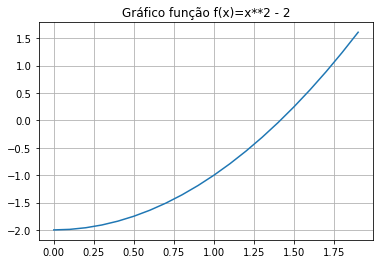

In [2]:
import math
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
def plot2d(f, inicio, fim):
    z = np.arange(inicio,fim,0.1)
    
    y = []
    for i in range(len(z)):
        y.append(f.subs(x,z[i]))
    
    fig, ax = plt.subplots()
    ax.set(title='Gráfico função f(x)='+str(f))
    ax.plot(z,y)
    ax.grid()
    plt.show()

x = symbols('x')
def f(x): return pow(x,2)-2
plot2d(f(x), 0, 2)

Pelo gráfico, sejam $a=1$ e $b=2$. Assim,

In [4]:
import math
from prettytable import PrettyTable
from sympy import *
import numpy as np
def newton(f, e, a, b):
    xk = []
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    end_condition = 0

    if f.subs(x,xk[len(xk)-1]) * diff(diff(f,x),x).subs(x,xk[len(xk)-1]) > 0:
        while not end_condition:
            # temp = xk[len(xk)-1] - f.subs(x,xk[len(xk)-1])
            func = f.subs(x,xk[len(xk)-1])
            derivate = diff(f,x).subs(x,xk[len(xk)-1])
            temp = xk[len(xk)-1] - func/derivate
            xk.append(N(temp))

            temp2 = xk[len(xk)-2] - xk[len(xk)-1]
            if temp2 < 0:
                temp2 = temp2 * -1

            xk_x.append(N(temp2))
            if xk_x[len(xk_x)-1] < e:
                end_condition = 1
            
        Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
        # Table.border = False
        for k in range(1, len(xk)):
            Table.add_row([k, xk[k], xk_x[k]])
        
        print(Table)

        print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

x = symbols('x')
def f(x): return x**2-2
newton(f(x), 0.00005, 1, 2)

+---+------------------+---------------------+
| k |        xk        |   |x(k) - x(k-1)|   |
+---+------------------+---------------------+
| 1 | 1.50000000000000 |  0.500000000000000  |
| 2 | 1.41666666666667 |  0.0833333333333333 |
| 3 | 1.41421568627451 | 0.00245098039215685 |
| 4 | 1.41421356237469 | 2.12389982001682e-6 |
+---+------------------+---------------------+
Donde ε é aproximadamente 1.41421356237469


Exemplo: Usando o método de Newton, obtenha uma aproximação para a solução da equação $f(x)=cos(x)-x$ com $\epsilon \leq 10^{-2}$.


Solução: Sabemos do segundo exemplo visto na seção "método do ponto fixo" que $a=0.5$, $b=1$ e $x_0 = \frac{\pi}{4}$. Logo,

In [13]:
import math
from prettytable import PrettyTable
from sympy import *
import numpy as np
def newton(f, e, a, b):
    xk = []
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    end_condition = 0

    if f.subs(x,xk[len(xk)-1]) * diff(diff(f,x),x).subs(x,xk[len(xk)-1]) > 0:
        while not end_condition:
            # temp = xk[len(xk)-1] - f.subs(x,xk[len(xk)-1])
            func = f.subs(x,xk[len(xk)-1])
            derivate = diff(f,x).subs(x,xk[len(xk)-1])
            temp = xk[len(xk)-1] - func/derivate
            xk.append(N(temp))

            temp2 = xk[len(xk)-2] - xk[len(xk)-1]
            if temp2 < 0:
                temp2 = temp2 * -1

            xk_x.append(N(temp2))
            if xk_x[len(xk_x)-1] < e:
                end_condition = 1
            
        Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
        # Table.border = False
        for k in range(1, len(xk)):
            Table.add_row([k, xk[k], xk_x[k]])
        
        print(Table)

        print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

x = symbols('x')
def f(x): return cos(x) - x
newton(f(x), 10**(-2), 0.5, math.pi/4)

+---+-------------------+----------------------+
| k |         xk        |   |x(k) - x(k-1)|    |
+---+-------------------+----------------------+
| 1 | 0.739536133515238 |  0.0458620298822100  |
| 2 | 0.739085178106010 | 0.000450955409228126 |
+---+-------------------+----------------------+
Donde ε é aproximadamente 0.739085178106010


## 3. Método da Secante

Nesta seção, o procedimento a ser usado é secante(f,epsilon,a,b).

Exemplo: Utilize o método da secante para encontrar uma solução de $x=cos(x) - x$ com $\epsilon \leq 10^{-5}$.

Solução: Como visto anteriormente, $a=0.5$, $b=1$ e $x_0=\frac{\pi}{4}$. Logo,

In [18]:
import math
from prettytable import PrettyTable
from sympy import *
import numpy as np
def secante(f, e, a, b):
    xk = []
    xk.append(a)
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    xk_x.append(0)
    end_condition = 0

    while not end_condition:
        temp  = f.subs(x, xk[len(xk)-1]) * (xk[len(xk)-1] - xk[len(xk)-2])
        temp2 = f.subs(x, xk[len(xk)-1]) - f.subs(x,xk[len(xk)-2])
        temp3 = xk[len(xk)-1] - (temp/temp2)
        xk.append(temp3)

        temp4 = xk[len(xk)-1] - xk[len(xk)-2]
        
        if temp4 < 0:
            temp4 = temp4 * -1

        xk_x.append(temp4)

        if xk_x[len(xk_x)-1] < e:
            end_condition = 1

    Table = PrettyTable(["k", "xk", "|x(k+1) - x(k)|"])     # perguntar (caderno)
    # Table.border = False
    for k in range(2, len(xk)):
        Table.add_row([k, xk[k], xk_x[k]])
        
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

def f(x): return cos(x) - x
secante(f(x), 10**(-5), 0.5, math.pi/4)

+---+-------------------+---------------------+
| k |         xk        |   |x(k+1) - x(k)|   |
+---+-------------------+---------------------+
| 2 | 0.736384138836582 |  0.0490140245608661 |
| 3 | 0.739058139213890 | 0.00267400037730758 |
| 4 | 0.739085149337276 | 2.70101233866837e-5 |
| 5 | 0.739085133215065 | 1.61222118988391e-8 |
+---+-------------------+---------------------+
Donde ε é aproximadamente 0.739085133215065


Exemplo: Determine uma raiz de $f(x)=x^3-4x^2+x+6$ com $\epsilon \leq 10^{-2}$.

Solução: Definamos f e plotamos seu gráfico:

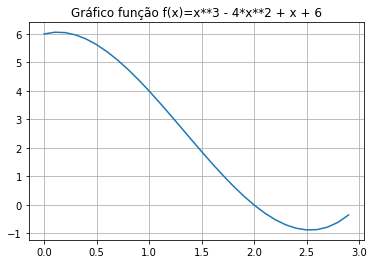

In [19]:
import math
import matplotlib.pyplot as plt
from sympy import *
import numpy as np
def plot2d(f, inicio, fim):
    z = np.arange(inicio,fim,0.1)
    
    y = []
    for i in range(len(z)):
        y.append(f.subs(x,z[i]))
    
    fig, ax = plt.subplots()
    ax.set(title='Gráfico função f(x)='+str(f))
    ax.plot(z,y)
    ax.grid()
    plt.show()

def f(x): return x**3 - 4*x**2 + x + 6
plot2d(f(x), 0, 3)

Pelo gráfico, escolhamos por exemplo, $x_0=1.4$ e $x_1=2.2$. Logo,

In [21]:
def secante(f, e, a, b):
    xk = []
    xk.append(a)
    xk.append(b)
    xk_x = []
    xk_x.append(0)
    xk_x.append(0)
    end_condition = 0

    while not end_condition:
        temp  = f.subs(x, xk[len(xk)-1]) * (xk[len(xk)-1] - xk[len(xk)-2])
        temp2 = f.subs(x, xk[len(xk)-1]) - f.subs(x,xk[len(xk)-2])
        temp3 = xk[len(xk)-1] - (temp/temp2)
        xk.append(temp3)

        temp4 = xk[len(xk)-1] - xk[len(xk)-2]
        
        if temp4 < 0:
            temp4 = temp4 * -1

        xk_x.append(temp4)

        if xk_x[len(xk_x)-1] < e:
            end_condition = 1

    Table = PrettyTable(["k", "xk", "|x(k+1) - x(k)|"])     # perguntar (caderno)
    # Table.border = False
    for k in range(2, len(xk)):
        Table.add_row([k, xk[k], xk_x[k]])
        
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

def f(x): return x**3-4*x**2+x+6
secante(f(x), 10**-2, 1.4, 2.2)

+---+------------------+----------------------+
| k |        xk        |   |x(k+1) - x(k)|    |
+---+------------------+----------------------+
| 2 | 2.05454545454545 |  0.145454545454546   |
| 3 | 1.98990775908844 |  0.0646376954570116  |
| 4 | 2.00038694058009 |  0.0104791814916478  |
| 5 | 2.00000257419361 | 0.000384366386477986 |
+---+------------------+----------------------+
Donde ε é aproximadamente 2.00000257419361


## 4. Método da Falsa Posição (Regula Falsi)

O procedimento a ser usado é regulaFalsi(f,epsilon,a,b).

Exemplo: Utilize o método Regula Falsi para encontrar uma solução de $x=cos(x)$ com $\epsilon \leq 10^{-5}$.

Solução: Sabemos dos exemplos anteriores que $a=0.5$, $b=1$ e $x_0=\frac{\pi}{4}$. Deste modo,

In [22]:
def regulaFalsi(f, e, a, b):
    xk = []
    xk_x = []

    x0 = a
    x1 = b

    end_condition = 0

    while not end_condition:
        temp = x1 - f.subs(x, x1) * (x1 - x0) / (f.subs(x, x1) - f.subs(x, x0))

        temp2 = temp - x1
        
        if temp2 < 0:
            temp2 = temp2 * -1

        if temp2 < e:
            xk.append(temp)
            xk_x.append(temp2)
            end_condition = 1
            continue

        k = f.subs(x, temp)

        if k*f.subs(x, x1) < 0:
            x0 = x1

        x1 = temp
        xk.append(temp)
        xk_x.append(temp2)
        

    Table = PrettyTable(["k", "xk", "|x(k) - x(k-1)|"])
    # Table.border = False
    for k in range(len(xk)):
        Table.add_row([k+2, xk[k], xk_x[k]])
        
    print(Table)
    print("Donde \u03B5 é aproximadamente " + str(xk[len(xk)-1]))

def f(x): return cos(x)-x
regulaFalsi(f(x), 0.00001, 0.5, math.pi/4)

+---+-------------------+---------------------+
| k |         xk        |   |x(k) - x(k-1)|   |
+---+-------------------+---------------------+
| 2 | 0.736384138836582 |  0.0490140245608661 |
| 3 | 0.739058139213890 | 0.00267400037730758 |
| 4 | 0.739084863814710 | 2.67246008200939e-5 |
| 5 | 0.739085130526579 | 2.66711869034708e-7 |
+---+-------------------+---------------------+
Donde ε é aproximadamente 0.739085130526579
